Homework 4: Fashion CNN

Introduce validation dataset by splitting the training dataset and validate the trained model.

There are 60,000 fashion MNIST training images. Generally, the training and validation data set is split into an 80:20 ratio. Thus, 20% of the data, 12,000 images are set aside for validation purposes and 48,000 images are used for training.

In this assignment, for output, I used code files from MNIST_CNN.ipynb and Classify-MovieReviews used for slicing, graph and accuracy.


Name: Urvashiben Thakkar

ID: 000789927

LTU Honor Code: I pledge that on all academic work that I submit, I neither gave nor received unauthorized aid, nor have I presented another person's work as my own.



Import Required Libraries

First, I import some requred libraries, including numpy, pandas, and tensorflow.I also import keras.datasets to load the fashion MNIST dataset.

In [1]:
# Import requered libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

Load the Dataset

The fashion MNIST dataset can be loaded using the keras.datasets.fashion_mnist function. It returns the training and testing datasets as NumPy arrays.

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


plot a grid of 20 images from the Fashion MNIST dataset along with their lables and class names.

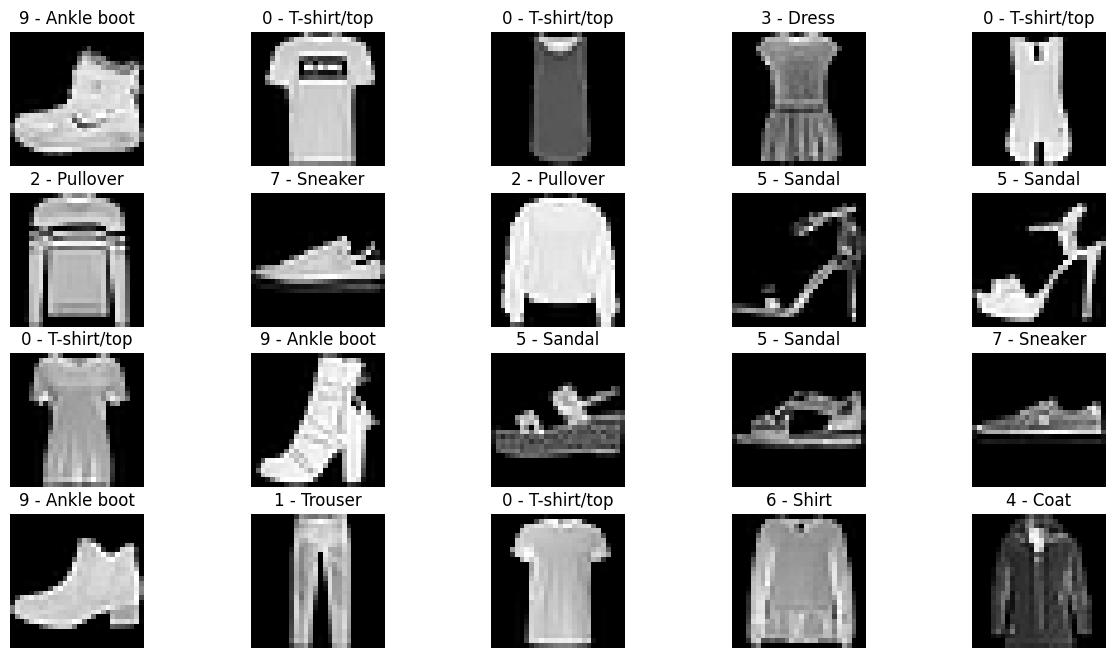

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']         # Define class names with each label.

plt.figure(figsize=(15, 8))                                               # Assign plot size
for i in range(20):                                                       # for loop iteration over 10 images
   plt.subplot(4, 5, i+1)                                                 # Arrange images in 2 rows and 5 columns
   plt.imshow(train_images[i], cmap='gray')                               # Use grayscale color map
   plt.title(f'{train_labels[i]} - {class_names[train_labels[i]]}')       # Set title for each image including label number and class name
   plt.axis('off')                                                        # Turn off axis
plt.show()                                                                # Display plot

Splitting Data for training and validation.

In [4]:
# Split the data into training and validation sets using slicing
x_train = train_images[0:48000]             #training images
y_train = train_labels[0:48000]             #training labels
x_val = train_images[48000:60001]           #Validation images
y_val = train_labels[48000:60001]           #validation labels

print("Number of training samples:", len(x_train))  # Print the number of samples in the training
print("Number of training labels:", len(y_train))   # Print the number of labels in training
print("Number of validation samples:", len(x_val))  # Print the number of samples in the validation
print("Number of validation labels:", len(y_val))   # Print the number of labels in validation


Normalization

In [5]:
x_train = x_train.reshape((48000, 28, 28, 1)) # 4D standard image shape
x_train = x_train.astype('float32') / 255

x_val = x_val.reshape((12000, 28, 28, 1))
x_val = x_val.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) # 4D standard image shape
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
# One-hot encode labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
test_labels = to_categorical(test_labels)

Number of training samples: 48000
Number of training labels: 48000
Number of validation samples: 12000
Number of validation labels: 12000


CNN model 1

In [6]:
from tensorflow import keras                                              # Import the Keras module from TensorFlow
from keras import layers                                                  # Import layers module from Keras for defining the model architecture

inputs = keras.Input(shape=(28, 28, 1))                                   # Define input layer with shape (28, 28, 1) for grayscale images
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)   # # Add a 2D convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
x = layers.MaxPooling2D(pool_size=2)(x)                                   # Add a max pooling layer with pool size of 2x2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)        # Add another 2D convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation
x = layers.MaxPooling2D(pool_size=2)(x)                                   # Add another max pooling layer with pool size of 2x2
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)       # Add another 2D convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation
x = layers.Flatten()(x)                                                   # Flatten the output of the convolutional layers to prepare for the fully connected layers
outputs = layers.Dense(10, activation="softmax")(x)                       # Add a fully connected dense layer with 10 units and softmax activation for classification
model = keras.Model(inputs=inputs, outputs=outputs)                      # Create a Keras Model with defined inputs and outputs


Compile Model

In [7]:
# Compile the model with accuracy as a metric
model.compile(optimizer='rmsprop',                    #Used 'rmsprop' optimizer for training
              loss='categorical_crossentropy', #Used categorical crossentropy loss function
              metrics=['accuracy'])                   # Specify accuracy as a metric

In [8]:
model.summary()  # Print model summary and it print whole summary regarding Our Neural Network design

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [9]:
# Training model for 20 epochs, using a batch size of 64, and monitoring its performance on a validation dataset

history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/20
750/750 [==============================] - 33s 42ms/step - loss: 0.5561 - accuracy: 0.7961 - val_loss: 0.4147 - val_accuracy: 0.8497
Epoch 2/20
750/750 [==============================] - 26s 35ms/step - loss: 0.3509 - accuracy: 0.8728 - val_loss: 0.3263 - val_accuracy: 0.8839
Epoch 3/20
750/750 [==============================] - 26s 35ms/step - loss: 0.2975 - accuracy: 0.8913 - val_loss: 0.3047 - val_accuracy: 0.8926
Epoch 4/20
750/750 [==============================] - 28s 37ms/step - loss: 0.2660 - accuracy: 0.9038 - val_loss: 0.3108 - val_accuracy: 0.8878
Epoch 5/20
750/750 [==============================] - 26s 35ms/step - loss: 0.2424 - accuracy: 0.9115 - val_loss: 0.2737 - val_accuracy: 0.8992
Epoch 6/20
750/750 [==============================] - 26s 35ms/step - loss: 0.2214 - accuracy: 0.9190 - val_loss: 0.2590 - val_accuracy: 0.9091
Epoch 7/20
750/750 [==============================] - 26s 35ms/step - loss: 0.2035 - accuracy: 0.9261 - val_loss: 0.2752 - val_accuracy:

In [10]:
# the detailed training history, as well as the specific metrics that were recorded during training
print(history.history)
print(history.history.keys())

{'loss': [0.5561217665672302, 0.35094699263572693, 0.29750949144363403, 0.26603201031684875, 0.24241653084754944, 0.22135041654109955, 0.2034575194120407, 0.1867530792951584, 0.17188946902751923, 0.15831258893013, 0.14431023597717285, 0.13151535391807556, 0.11979439109563828, 0.10992632061243057, 0.0984363704919815, 0.09017296135425568, 0.08139434456825256, 0.07353391498327255, 0.06780903786420822, 0.06107242405414581], 'accuracy': [0.7960625290870667, 0.8728125095367432, 0.8913333415985107, 0.9038333296775818, 0.9114583134651184, 0.9190000295639038, 0.9261041879653931, 0.9321458339691162, 0.9367499947547913, 0.9415208101272583, 0.9479583501815796, 0.9519166946411133, 0.9570416808128357, 0.9604374766349792, 0.9645416736602783, 0.9670416712760925, 0.9702708125114441, 0.973312497138977, 0.9764583110809326, 0.9780416488647461], 'val_loss': [0.41468045115470886, 0.3263084888458252, 0.3046689033508301, 0.31076616048812866, 0.2737484276294708, 0.25898244976997375, 0.27523061633110046, 0.2746

Plotting for training and validation loss for Model1


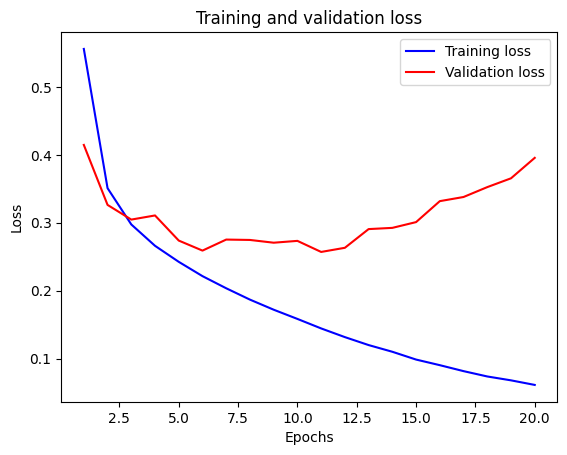

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Plotting for training and validation accuracy Model1

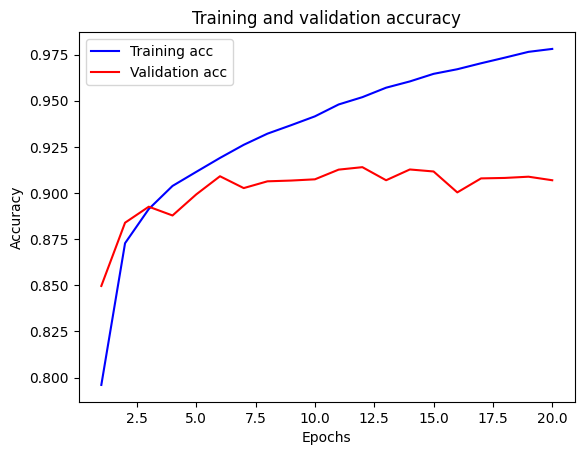

In [12]:
plt.clf()   # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
# Evaluate the model on the test dataset with integer labels

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.4049 - accuracy: 0.9050
Test loss: 0.4049268066883087
Test accuracy: 0.9049999713897705


Now let's test a test image, test_images[20]

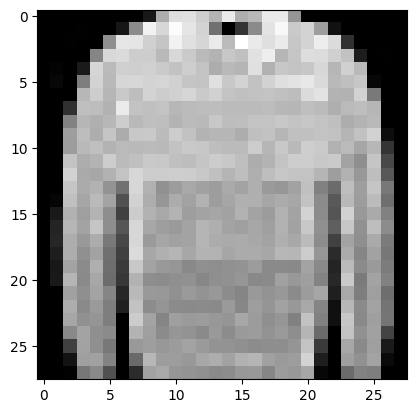

In [14]:
plt.figure()
plt.imshow(test_images[20], cmap='gray', interpolation='none') # need to use original data to display

In [15]:
#This model predict perticular test image
label_number=np.argmax(model.predict(np.array([test_images[20]])))
print(f'{label_number} {class_names[label_number]}')

1/1 [==============================] - 0s 85ms/step
2 Pullover


Due to in model1 some where validation loss is increased, which is overfitted that is reason I am creating model 2 which included concept of early stopping. This function helps to fix overfitting issue.

CNN model 2

In [16]:
from tensorflow import keras                                              # Import the Keras module2 from TensorFlow
from keras import layers                                                  # Import layers module from Keras for defining the model2 architecture

inputs = keras.Input(shape=(28, 28, 1))                                   # Define input layer with shape (28, 28, 1) for grayscale images
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)   # # Add a 2D convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
x = layers.MaxPooling2D(pool_size=2)(x)                                   # Add a max pooling layer with pool size of 2x2
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)        # Add another 2D convolutional layer with 64 filters, a kernel size of 3x3, and ReLU activation
x = layers.MaxPooling2D(pool_size=2)(x)                                   # Add another max pooling layer with pool size of 2x2
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)       # Add another 2D convolutional layer with 128 filters, a kernel size of 3x3, and ReLU activation
x = layers.Flatten()(x)                                                   # Flatten the output of the convolutional layers to prepare for the fully connected layers
outputs = layers.Dense(10, activation="softmax")(x)                       # Add a fully connected dense layer with 10 units and softmax activation for classification
model2 = keras.Model(inputs=inputs, outputs=outputs)                      # Create a Keras Model2 with defined inputs and outputs


In [17]:
# Compile the model with accuracy as a metric
model2.compile(optimizer='rmsprop',                    # Used 'rmsprop' optimizer for training
              loss='categorical_crossentropy',         # Used categorical crossentropy loss function
              metrics=['accuracy'])                    # Specify accuracy as a metric

In [18]:
model2.summary()  # Print model summary and it print whole summary regarding Our Neural Network design

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

Early Stopping

In [19]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(  # Define EarlyStopping callback
    monitor="val_loss",    # Quantity to be monitored for improvement
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (0, 1, or 2)
    mode="auto",           # Direction of improvement ("auto", "min", or "max")
    baseline=None,         # Baseline value for the monitored quantity
    restore_best_weights=False  # Whether to restore model weights to the epoch with the best value of the monitored quantity
)

In [20]:
# Train the model with early stopping
history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, callbacks=callback, batch_size=64)

Epoch 1/30
750/750 [==============================] - 27s 36ms/step - loss: 0.5636 - accuracy: 0.7916 - val_loss: 0.3817 - val_accuracy: 0.8623
Epoch 2/30
750/750 [==============================] - 26s 35ms/step - loss: 0.3473 - accuracy: 0.8731 - val_loss: 0.3317 - val_accuracy: 0.8822
Epoch 3/30
750/750 [==============================] - 26s 35ms/step - loss: 0.2950 - accuracy: 0.8928 - val_loss: 0.3081 - val_accuracy: 0.8852
Epoch 4/30
750/750 [==============================] - 26s 35ms/step - loss: 0.2634 - accuracy: 0.9046 - val_loss: 0.3016 - val_accuracy: 0.8903
Epoch 5/30
750/750 [==============================] - 27s 36ms/step - loss: 0.2382 - accuracy: 0.9129 - val_loss: 0.2636 - val_accuracy: 0.9065
Epoch 6/30
750/750 [==============================] - 27s 36ms/step - loss: 0.2175 - accuracy: 0.9209 - val_loss: 0.2665 - val_accuracy: 0.9053
Epoch 7/30
750/750 [==============================] - 26s 35ms/step - loss: 0.1991 - accuracy: 0.9276 - val_loss: 0.2767 - val_accuracy:

In [21]:
# The detailed training history, as well as the specific metrics that were recorded during training
print(history2.history)
print(history2.history.keys())

{'loss': [0.5635825395584106, 0.34732726216316223, 0.2949768602848053, 0.26335006952285767, 0.2382030040025711, 0.21746209263801575, 0.1991090029478073, 0.18436342477798462, 0.169454887509346, 0.15574823319911957, 0.14297261834144592], 'accuracy': [0.7915624976158142, 0.8731458187103271, 0.8927500247955322, 0.9046249985694885, 0.9128958582878113, 0.9209166765213013, 0.9276458621025085, 0.9336875081062317, 0.9375208616256714, 0.9431041479110718, 0.9482499957084656], 'val_loss': [0.3816598355770111, 0.33170002698898315, 0.3080696165561676, 0.3015936613082886, 0.2636203467845917, 0.26649609208106995, 0.27672845125198364, 0.24373503029346466, 0.26974764466285706, 0.2545357644557953, 0.2653962969779968], 'val_accuracy': [0.862333357334137, 0.8821666836738586, 0.8851666450500488, 0.890333354473114, 0.906499981880188, 0.9053333401679993, 0.9010833501815796, 0.9154999852180481, 0.9066666960716248, 0.9118333458900452, 0.9109166860580444]}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy

CNN model2 plot for training and validation loss

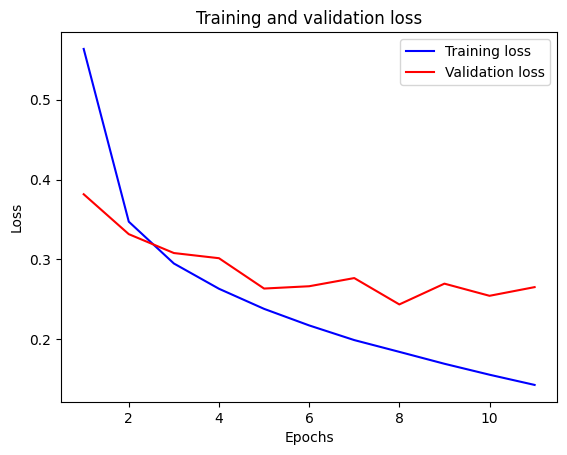

In [22]:
#import matplotlib.pyplot as plt

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

CNN model2 plot for training and validation Accuracy

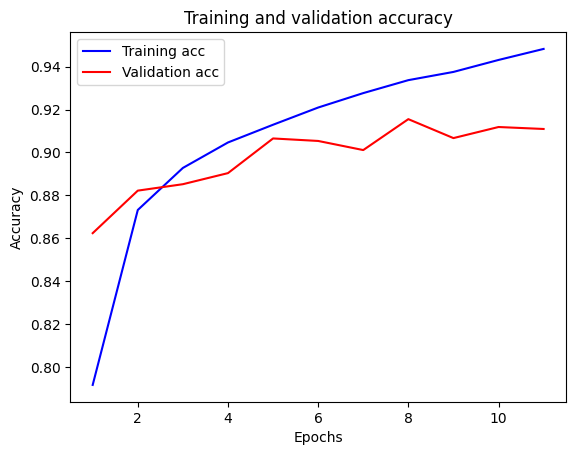

In [23]:
plt.clf()
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Evalute test loss and test accuracy

In [24]:
# Evaluate the model on the test dataset with integer labels

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 8ms/step - loss: 0.2842 - accuracy: 0.9052
Test loss: 0.28418123722076416
Test accuracy: 0.9052000045776367


Randomly select 16 unique unseen test images and test/inference them
on the final model.

1/1 [==============================] - 0s 21ms/step


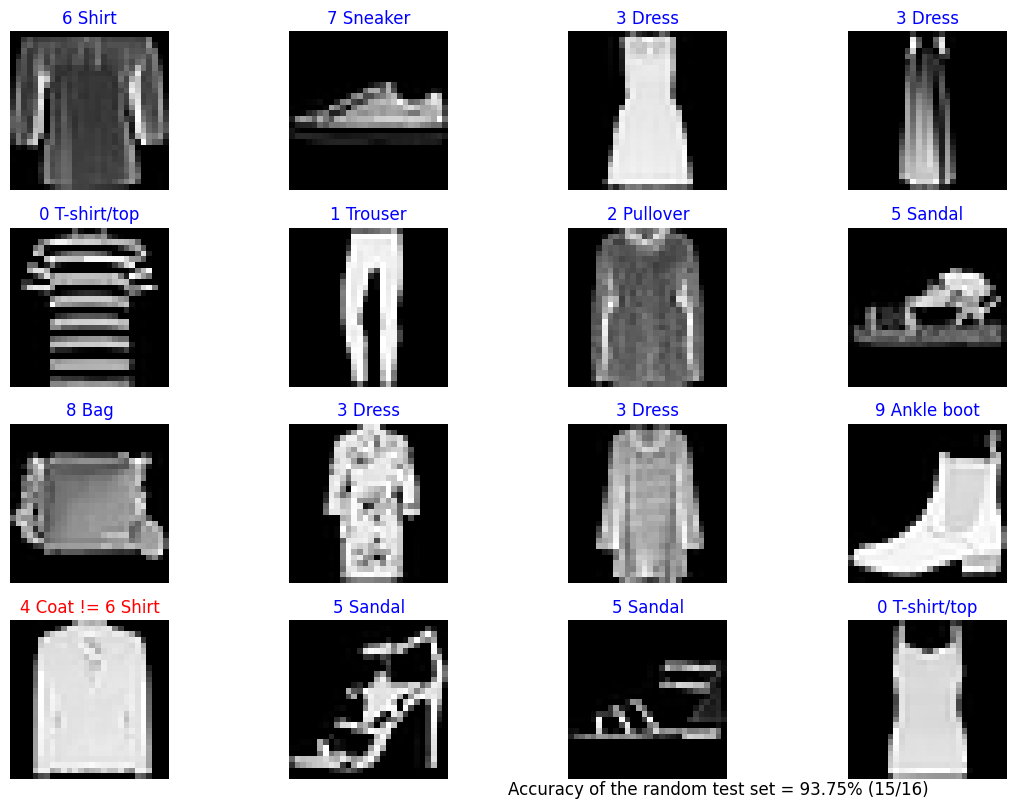

In [25]:
# Randomly select 16 unique indices from the test set

test_indices = np.random.choice(len(test_images), 16, replace=False)
counter=0
# Plot the selected images and perform inference
plt.figure(figsize=(12, 8))
for i, index in enumerate(test_indices, 1):
    image = test_images[index]
    label = test_labels[index]
    predicted_label = np.argmax(model.predict(np.array([image])))

    plt.subplot(4, 4, i)
    plt.imshow(image, cmap='gray')

    if predicted_label == np.argmax(label):  # Ensure true_label is converted to single value
        plt.title(f"{np.argmax(label)} {class_names[np.argmax(label)]}", color="blue")
        counter = counter+1
    else:
        correct_label = np.argmax(label)
        plt.title(f"{correct_label} {class_names[correct_label]} != {predicted_label} {class_names[predicted_label]}", color="red")

    plt.axis('off')

total_images = 16
accuracy = (counter / total_images)*100

plt.figtext(0.5, 0.00005, f"Accuracy of the random test set = {accuracy}% ({counter}/{total_images})", ha='left', fontsize=12)

plt.tight_layout()
plt.show()

SUMMARY :- Models 1 and Model 2: Using the Fashion MNIST dataset, you developed two convolutional neural network (CNN) models, named model and model2. The design of both models is identical, with three convolutional layers, two dense layers, a flattening layer, and then max-pooling layers. The number of units in the dense layers and the number of filters in the convolutional layers are the primary differences between the models.


Early Stopping: In machine learning models, early stopping is a strategy used to avoid overfitting.Here, I used patience = 3 which helps to monitor validation loss. If validation loss increases 3 times, keeps patience 3 times and then it prints message early stopping. It means tracking the model's performance on a validation set during training and stopping the process when the model's performance begins to worse.

Validation: A model's performance on unseen data or test data , it is necessary to evaluate it on a different dataset, or validation set. This may be used to adjust hyperparameters and avoid overfitting and it increases performance of the model  , as well as to evaluate how effectively the model generalizes to new data.


Overfitting :- When a model learns to perform well on training data  but is unable to generalize to new, unknown data or unseen data, it is called  to be overfitting. This can occur when a model is trained for an excessive number of epochs or becomes overly complicated, which makes the model memorize the training data every time  instead of learning broad patterns.